In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv('day.csv')

In [3]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
df.isnull().sum()                                                                                                                    

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

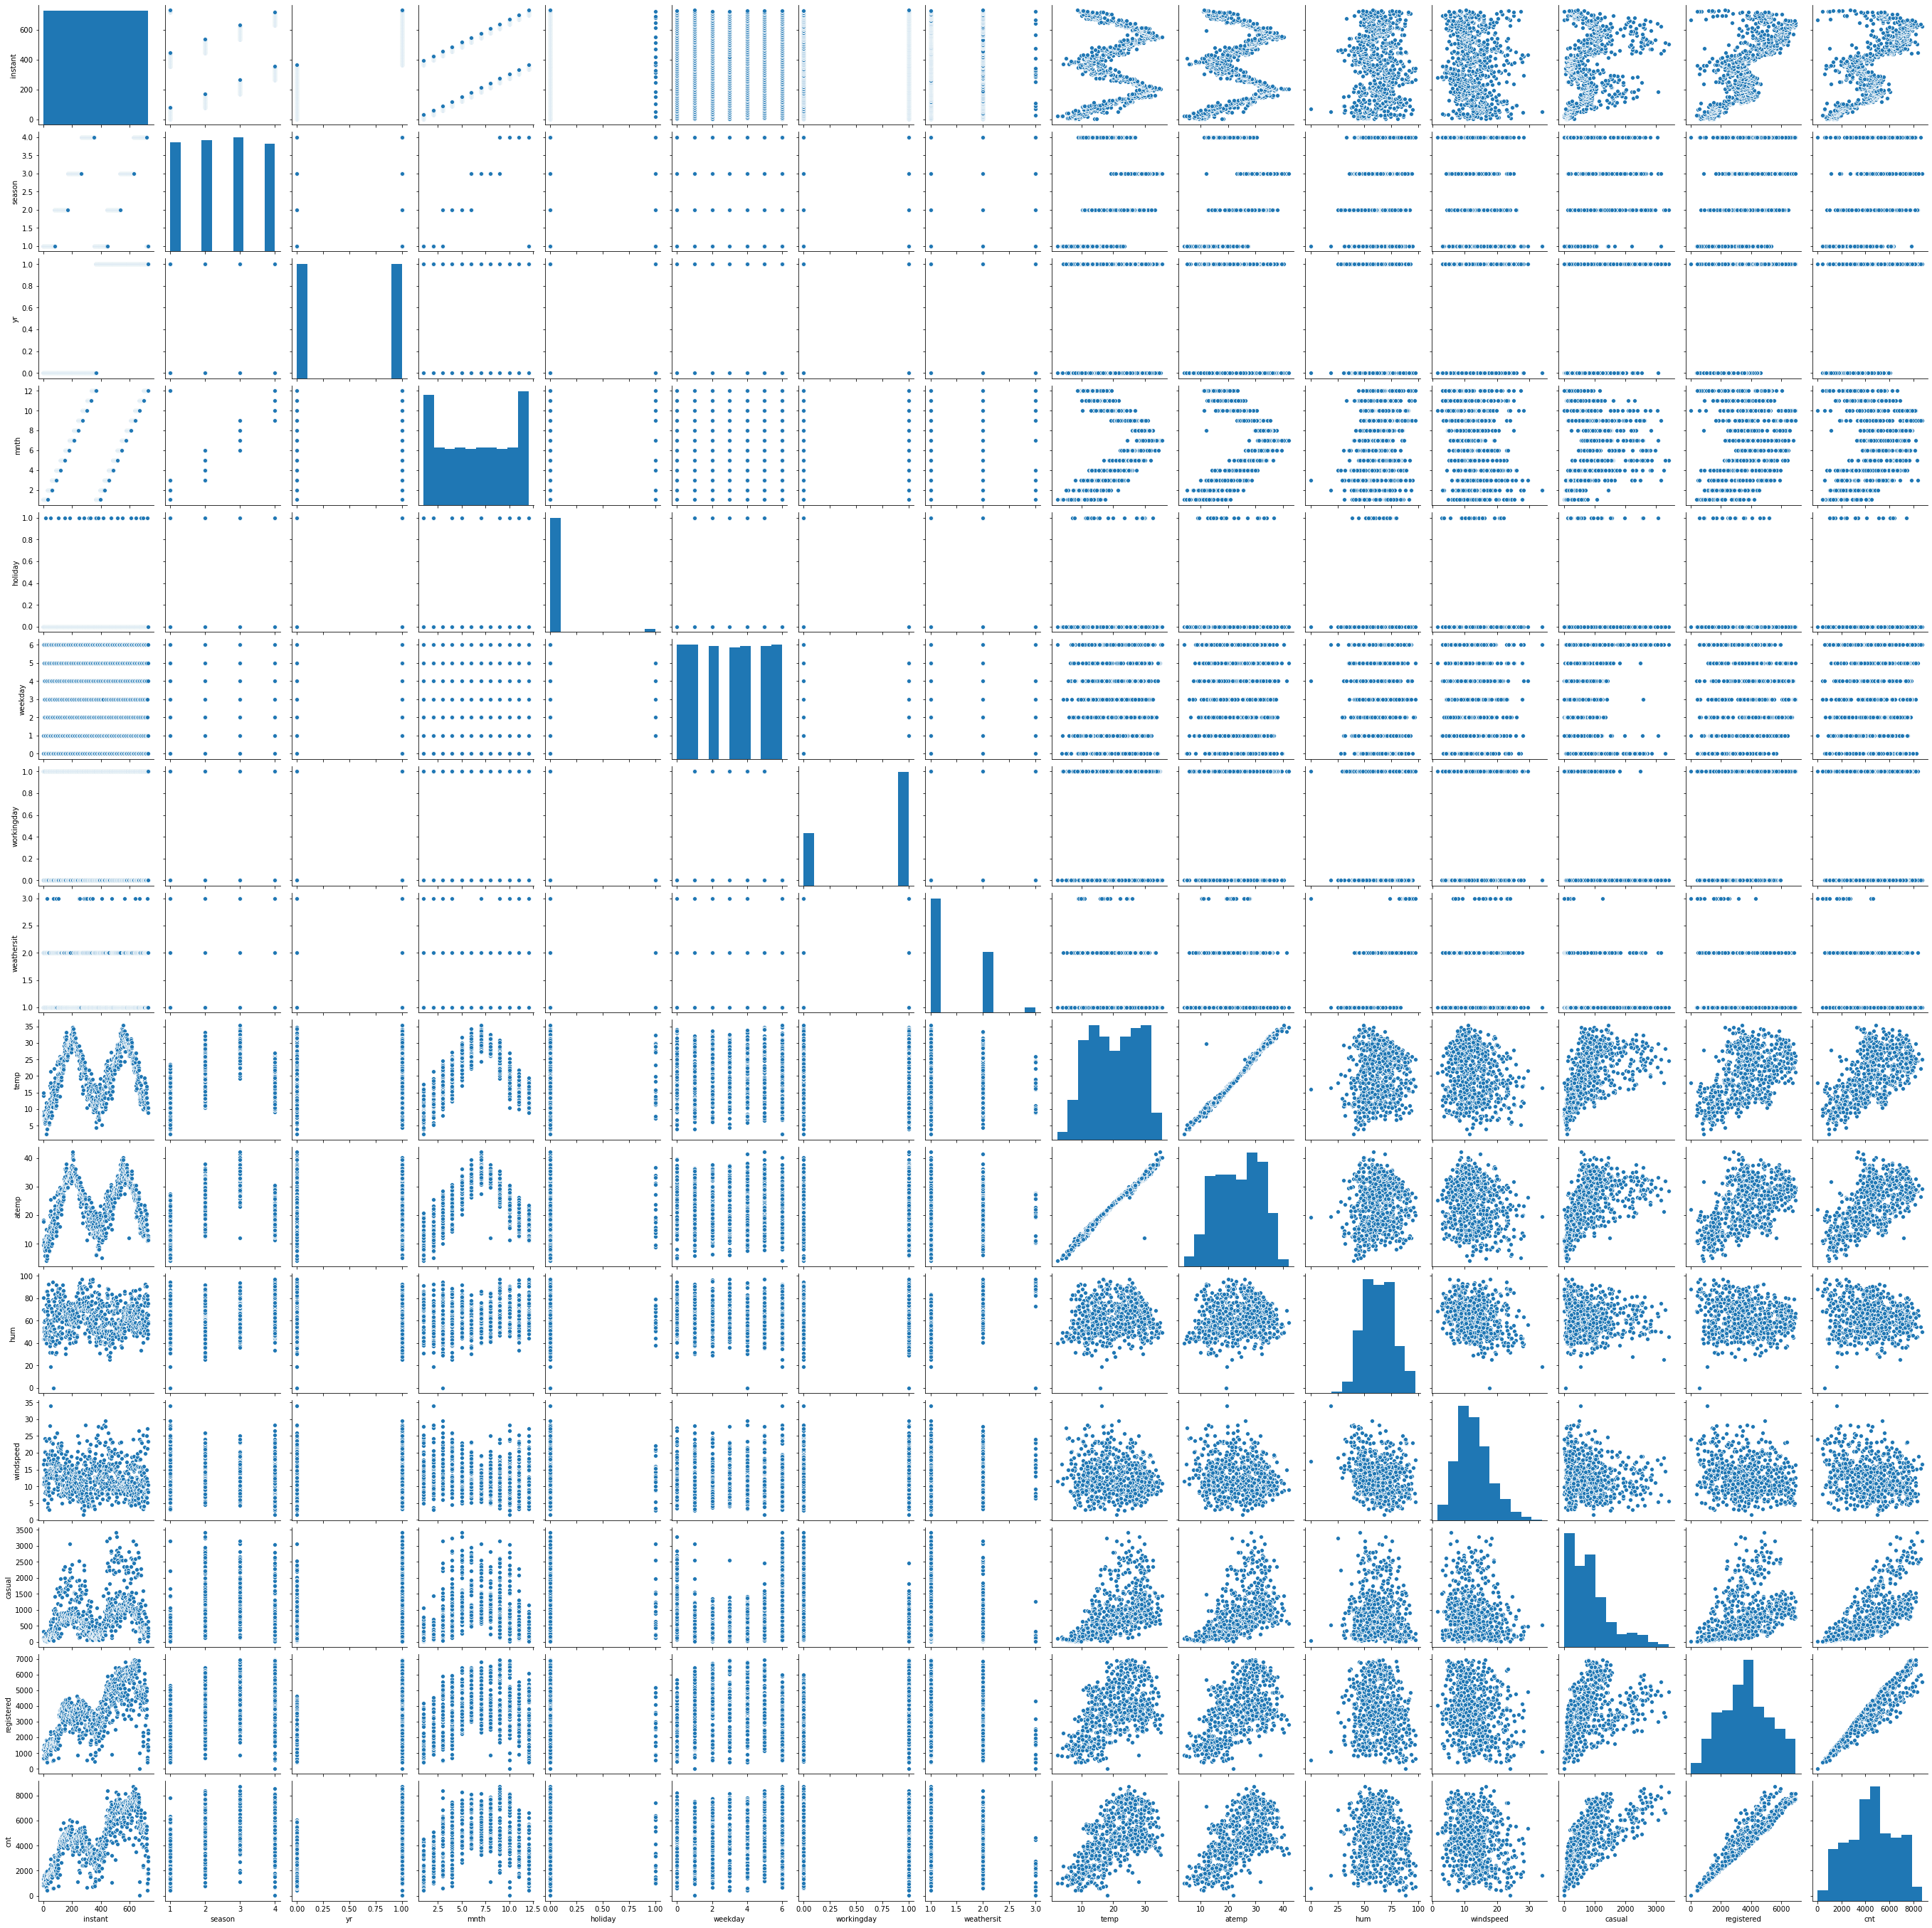

In [7]:
#visualizing numeric variables
sns.pairplot(df)

#Inferance from above pairplot.

The sales of the bikes is highly dependend upon the registered column and have positive linear relation with the column atemp and temp.

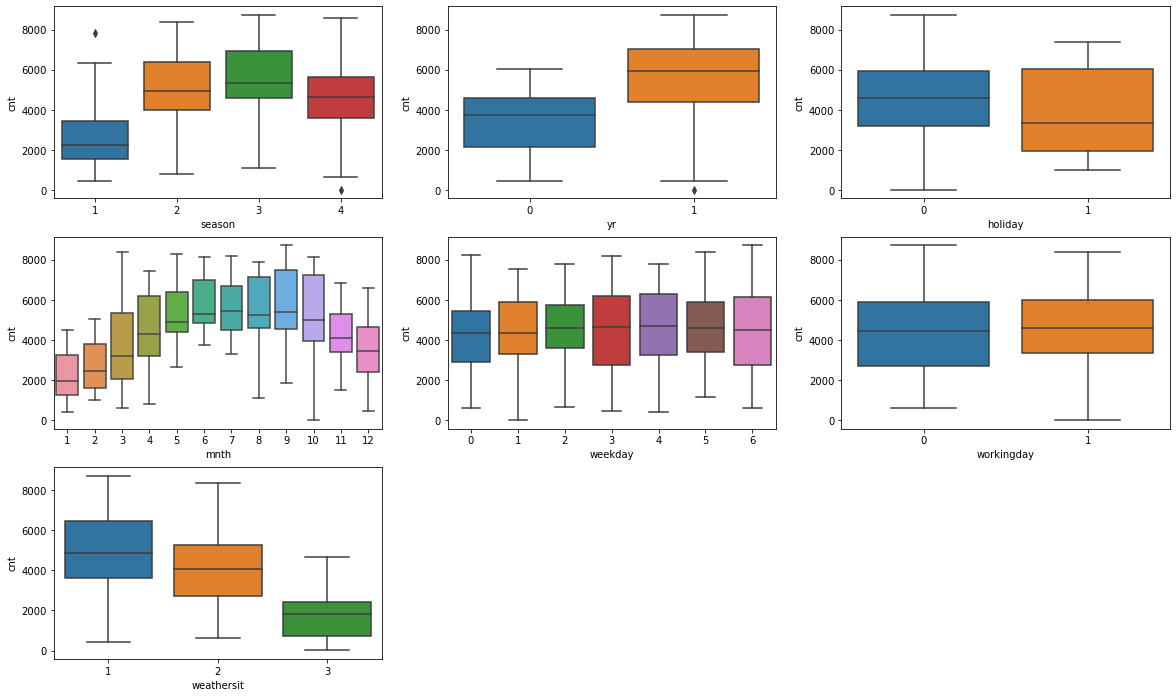

In [8]:
#visualizing categorical variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(data = df,x= 'season',y= 'cnt')

plt.subplot(3,3,2)
sns.boxplot(data = df,x= 'yr',y= 'cnt')
#plt.show()

plt.subplot(3,3,3)
sns.boxplot(data = df,x= 'holiday',y= 'cnt')


plt.subplot(3,3,4)
sns.boxplot(data = df,x= 'mnth',y= 'cnt')

plt.subplot(3,3,5)
sns.boxplot(data = df,x= 'weekday',y= 'cnt')

plt.subplot(3,3,6)
sns.boxplot(data = df,x= 'workingday',y= 'cnt')

plt.subplot(3,3,7)
sns.boxplot(data = df,x= 'weathersit',y= 'cnt')

plt.show()

#infern from above box plots
1.	Season: The sale count maximum in Fall and least in spring. 
2.	Year: The sale increases from 2018 to 2019. Which means sales are increasing as the year is passing by.
3.	Mnth: The sale increase as the summer approaches and decrease again as the winter approaches.
4.	workingday:  The sales of the bike is more on working days then the non working days.
5.	Holiday: The sale is more on non holiday then the holiday
6.	Weatershit: The sale is more on clear weather days then the cloudy or rainy/snow day.


In [9]:
# convert dummy vars


In [10]:
#converting season into dummy varibale 
#since season is a numberic value first we will change it in string cahracter value then change those values into dummy values.


df.season

0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    1
727    1
728    1
729    1
Name: season, Length: 730, dtype: int64

In [11]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
season_dict  = {
    
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

In [13]:
df['season'] = df.season.replace(season_dict)

In [14]:
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [15]:
# now we can create dummy variables
seasons  = pd.get_dummies(df['season'])
seasons.head()


Fall  Spring  Summer  Winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0

In [16]:
#since we have redundant value here in seasons dataframe we can drop one value.
seasons  = pd.get_dummies(df['season'],drop_first =True)
seasons.head()

Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [17]:
# we will concatinate the seasons datafram to our original df dataframe
df  = pd.concat([df,seasons],axis = 1)

In [18]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  Spring   0     1        0        6           0   
1        2  02-01-2018  Spring   0     1        0        0           0   
2        3  03-01-2018  Spring   0     1        0        1           1   
3        4  04-01-2018  Spring   0     1        0        2           1   
4        5  05-01-2018  Spring   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  Spring  Summer  Winter  
0   985       1       0       0  
1   801       1       0       0  
2  1349       1       0       0  
3  1562       1       0       0  
4  1600       1       0       0

In [19]:
# now we dont need season column in df dataframe so we can drop 
df  = df.drop('season',axis=1)
df.head()

instant      dteday  yr  mnth  holiday  weekday  workingday  weathersit  \
0        1  01-01-2018   0     1        0        6           0           2   
1        2  02-01-2018   0     1        0        0           0           2   
2        3  03-01-2018   0     1        0        1           1           1   
3        4  04-01-2018   0     1        0        2           1           1   
4        5  05-01-2018   0     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  Spring  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985       1   
1  14.902598  17.68695  69.6087  16.652113     131         670   801       1   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349       1   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562       1   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600       1   

   Summer  Winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

In [20]:
#similarly we will create dummy variables for column weathersit 
weekday_dict  = {
    
    1: 'Monday',
    2: 'Tueday',
    3: 'Wednesday',
    4: 'Thrusday',
    5: 'Friday',
    6: 'Saturday',
    0: 'Sunday'
}

In [21]:
df['weekday'] = df.weekday.replace(weekday_dict)

In [22]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [23]:
weekday  = pd.get_dummies(df['weekday'])

In [24]:
weekday  = weekday.drop('Saturday',axis=1)

In [25]:
df  = pd.concat([df,weekday],axis =1)

In [26]:
df = df.drop('weekday',axis=1)

In [27]:
#similarly we will create dummy variables for column weathersit 
weather_dict  = {
    
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Rain',
    4: 'Heavy Rain/Snow'
}

In [28]:
df['weathersit'] = df.weathersit.replace(weather_dict)

In [29]:
df.weathersit.value_counts()

Clear         463
Cloudy        246
Light Rain     21
Name: weathersit, dtype: int64

In [30]:
# now creating dummy varaibles of weathersit column and dropping the redundant column 

weather  = pd.get_dummies(df['weathersit'])

In [31]:
weather.head()

Clear  Cloudy  Light Rain
0      0       1           0
1      0       1           0
2      1       0           0
3      1       0           0
4      1       0           0

In [32]:
#out of four weather types only 3 values are there in weathersit column. 
#We can drop Lightrain column to overcome redundancy as it have very low number of occurance in weatherist column.


weather  = weather.drop('Light Rain',axis=1)


In [33]:
#now we can concat the two dataframes

df  = pd.concat([df,weather],axis =1)

In [34]:
df.head()

instant      dteday  yr  mnth  holiday  workingday weathersit       temp  \
0        1  01-01-2018   0     1        0           0     Cloudy  14.110847   
1        2  02-01-2018   0     1        0           0     Cloudy  14.902598   
2        3  03-01-2018   0     1        0           1      Clear   8.050924   
3        4  04-01-2018   0     1        0           1      Clear   8.200000   
4        5  05-01-2018   0     1        0           1      Clear   9.305237   

      atemp      hum  ...  Summer  Winter  Friday  Monday  Sunday  Thrusday  \
0  18.18125  80.5833  ...       0       0       0       0       0         0   
1  17.68695  69.6087  ...       0       0       0       0       1         0   
2   9.47025  43.7273  ...       0       0       0       1       0         0   
3  10.60610  59.0435  ...       0       0       0       0       0         0   
4  11.46350  43.6957  ...       0       0       0       0       0         0   

   Tueday  Wednesday  Clear  Cloudy  
0       0          0      0       1  
1       0          0      0       1  
2       0          0      1       0  
3       1          0      1       0  
4       0          1      1       0  

[5 rows x 25 columns]

In [35]:
#now we can drop wethersit column
df = df.drop('weathersit',axis=1)

In [36]:
df.head()

instant      dteday  yr  mnth  holiday  workingday       temp     atemp  \
0        1  01-01-2018   0     1        0           0  14.110847  18.18125   
1        2  02-01-2018   0     1        0           0  14.902598  17.68695   
2        3  03-01-2018   0     1        0           1   8.050924   9.47025   
3        4  04-01-2018   0     1        0           1   8.200000  10.60610   
4        5  05-01-2018   0     1        0           1   9.305237  11.46350   

       hum  windspeed  ...  Summer  Winter  Friday  Monday  Sunday  Thrusday  \
0  80.5833  10.749882  ...       0       0       0       0       0         0   
1  69.6087  16.652113  ...       0       0       0       0       1         0   
2  43.7273  16.636703  ...       0       0       0       1       0         0   
3  59.0435  10.739832  ...       0       0       0       0       0         0   
4  43.6957  12.522300  ...       0       0       0       0       0         0   

   Tueday  Wednesday  Clear  Cloudy  
0       0          0      0       1  
1       0          0      0       1  
2       0          0      1       0  
3       1          0      1       0  
4       0          1      1       0  

[5 rows x 24 columns]

In [37]:
#creating dummy values for month columns
month_dict  = {
    
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'April',
    5:'May',
    6:'June',
    7:'July',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov'
}

In [38]:
df['mnth'] = df.mnth.replace(month_dict)

In [39]:
months  = pd.get_dummies(df['mnth'])

In [40]:
months

12  April  Aug  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep
0     0      0    0    0    1     0     0    0    0    0    0    0
1     0      0    0    0    1     0     0    0    0    0    0    0
2     0      0    0    0    1     0     0    0    0    0    0    0
3     0      0    0    0    1     0     0    0    0    0    0    0
4     0      0    0    0    1     0     0    0    0    0    0    0
..   ..    ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...
725   1      0    0    0    0     0     0    0    0    0    0    0
726   1      0    0    0    0     0     0    0    0    0    0    0
727   1      0    0    0    0     0     0    0    0    0    0    0
728   1      0    0    0    0     0     0    0    0    0    0    0
729   1      0    0    0    0     0     0    0    0    0    0    0

[730 rows x 12 columns]

In [41]:
#concat the month 
df  = pd.concat([df,months],axis =1)

In [42]:
df.head()

instant      dteday  yr mnth  holiday  workingday       temp     atemp  \
0        1  01-01-2018   0  Jan        0           0  14.110847  18.18125   
1        2  02-01-2018   0  Jan        0           0  14.902598  17.68695   
2        3  03-01-2018   0  Jan        0           1   8.050924   9.47025   
3        4  04-01-2018   0  Jan        0           1   8.200000  10.60610   
4        5  05-01-2018   0  Jan        0           1   9.305237  11.46350   

       hum  windspeed  ...  Aug  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
0  80.5833  10.749882  ...    0    0    1     0     0    0    0    0    0    0  
1  69.6087  16.652113  ...    0    0    1     0     0    0    0    0    0    0  
2  43.7273  16.636703  ...    0    0    1     0     0    0    0    0    0    0  
3  59.0435  10.739832  ...    0    0    1     0     0    0    0    0    0    0  
4  43.6957  12.522300  ...    0    0    1     0     0    0    0    0    0    0  

[5 rows x 36 columns]

In [43]:
df  = df.drop('mnth',axis=1)

In [44]:
df.head()

instant      dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01-01-2018   0        0           0  14.110847  18.18125  80.5833   
1        2  02-01-2018   0        0           0  14.902598  17.68695  69.6087   
2        3  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3        4  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4        5  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  Aug  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
0  10.749882     331  ...    0    0    1     0     0    0    0    0    0    0  
1  16.652113     131  ...    0    0    1     0     0    0    0    0    0    0  
2  16.636703     120  ...    0    0    1     0     0    0    0    0    0    0  
3  10.739832     108  ...    0    0    1     0     0    0    0    0    0    0  
4  12.522300      82  ...    0    0    1     0     0    0    0    0    0    0  

[5 rows x 35 columns]

In [45]:
# we can drop date columns as it is not providing any useful information:
df = df.drop('dteday',axis=1)

In [46]:
df.head()

instant  yr  holiday  workingday       temp     atemp      hum  windspeed  \
0        1   0        0           0  14.110847  18.18125  80.5833  10.749882   
1        2   0        0           0  14.902598  17.68695  69.6087  16.652113   
2        3   0        0           1   8.050924   9.47025  43.7273  16.636703   
3        4   0        0           1   8.200000  10.60610  59.0435  10.739832   
4        5   0        0           1   9.305237  11.46350  43.6957  12.522300   

   casual  registered  ...  Aug  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
0     331         654  ...    0    0    1     0     0    0    0    0    0    0  
1     131         670  ...    0    0    1     0     0    0    0    0    0    0  
2     120        1229  ...    0    0    1     0     0    0    0    0    0    0  
3     108        1454  ...    0    0    1     0     0    0    0    0    0    0  
4      82        1518  ...    0    0    1     0     0    0    0    0    0    0  

[5 rows x 34 columns]

In [47]:
df  = df.drop('instant',axis=1)

In [48]:
df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  ...  Aug  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
0         654   985  ...    0    0    1     0     0    0    0    0    0    0  
1         670   801  ...    0    0    1     0     0    0    0    0    0    0  
2        1229  1349  ...    0    0    1     0     0    0    0    0    0    0  
3        1454  1562  ...    0    0    1     0     0    0    0    0    0    0  
4        1518  1600  ...    0    0    1     0     0    0    0    0    0    0  

[5 rows x 33 columns]

In [49]:
# as column temp and atemp both refer to temperature we can drop one of them
# aslo since our target variable is cnt and casual,registered columns sum is cnt hence we can dop these two columns too.

df = df.drop(['temp','casual','registered'],axis=1)

In [50]:
df.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  Spring  \
0   0        0           0  18.18125  80.5833  10.749882   985       1   
1   0        0           0  17.68695  69.6087  16.652113   801       1   
2   0        0           1   9.47025  43.7273  16.636703  1349       1   
3   0        0           1  10.60610  59.0435  10.739832  1562       1   
4   0        0           1  11.46350  43.6957  12.522300  1600       1   

   Summer  Winter  ...  Aug  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
0       0       0  ...    0    0    1     0     0    0    0    0    0    0  
1       0       0  ...    0    0    1     0     0    0    0    0    0    0  
2       0       0  ...    0    0    1     0     0    0    0    0    0    0  
3       0       0  ...    0    0    1     0     0    0    0    0    0    0  
4       0       0  ...    0    0    1     0     0    0    0    0    0    0  

[5 rows x 30 columns]

In [51]:
# Now we will splt the data frame in train and test.
df_train, df_test = train_test_split(df,train_size=0.7,random_state = 300)

In [52]:
df_train.shape

(510, 30)

In [53]:
df_test.shape

(220, 30)

In [54]:
#Now we will do scaling of the numeric columns
scaler  = MinMaxScaler()

var = ['atemp','hum','windspeed','cnt']
#var = ['atemp','hum','windspeed']
df_train[var] = scaler.fit_transform(df_train[var])

In [55]:
df_train.head()

yr  holiday  workingday     atemp       hum  windspeed       cnt  Spring  \
547   1        0           1  0.833624  0.460712   0.412422  0.713875       0   
626   1        0           1  0.617334  0.553027   0.459915  0.870801       0   
309   0        0           0  0.379082  0.756977   0.166191  0.417280       0   
561   1        0           1  0.863180  0.664663   0.338275  0.783249       0   
471   1        0           1  0.695057  0.402319   0.599367  0.767257       0   

     Summer  Winter  ...  Aug  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
547       0       0  ...    0    0    0     1     0    0    0    0    0    0  
626       0       0  ...    0    0    0     0     0    0    0    0    0    1  
309       0       1  ...    0    0    0     0     0    0    0    1    0    0  
561       0       0  ...    0    0    0     1     0    0    0    0    0    0  
471       1       0  ...    0    0    0     0     0    0    0    0    0    0  

[5 rows x 30 columns]

In [56]:
df_train.describe()

yr     holiday  workingday       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.490196    0.027451    0.684314    0.526317    0.642182    0.411446   
std      0.500395    0.163554    0.465245    0.222188    0.146939    0.189147   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.335987    0.525440    0.268910   
50%      0.000000    0.000000    1.000000    0.542978    0.640403    0.386730   
75%      1.000000    0.000000    1.000000    0.710695    0.743237    0.513333   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      Spring      Summer      Winter  ...         Aug  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513390    0.245098    0.245098    0.245098  ...    0.088235   
std      0.222827    0.430568    0.430568    0.430568  ...    0.283915   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.362143    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.522204    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.676542    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Feb         Jan        July        June         Mar         May  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.068627    0.088235    0.082353    0.074510    0.080392    0.084314   
std      0.253068    0.283915    0.275172    0.262857    0.272166    0.278131   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Nov         Oct         Sep  
count  510.000000  510.000000  510.000000  
mean     0.082353    0.084314    0.088235  
std      0.275172    0.278131    0.283915  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [57]:
df_train.head()
y_train  = df_train.pop('cnt')

In [58]:
X_train = df_train

In [59]:
X_train.head()

yr  holiday  workingday     atemp       hum  windspeed  Spring  Summer  \
547   1        0           1  0.833624  0.460712   0.412422       0       0   
626   1        0           1  0.617334  0.553027   0.459915       0       0   
309   0        0           0  0.379082  0.756977   0.166191       0       0   
561   1        0           1  0.863180  0.664663   0.338275       0       0   
471   1        0           1  0.695057  0.402319   0.599367       0       1   

     Winter  Friday  ...  Aug  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
547       0       0  ...    0    0    0     1     0    0    0    0    0    0  
626       0       0  ...    0    0    0     0     0    0    0    0    0    1  
309       1       0  ...    0    0    0     0     0    0    0    1    0    0  
561       0       0  ...    0    0    0     1     0    0    0    0    0    0  
471       0       0  ...    0    0    0     0     0    0    0    0    0    0  

[5 rows x 29 columns]

Running RFE

In [60]:

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 15),
 ('Winter', False, 13),
 ('Friday', True, 1),
 ('Monday', False, 4),
 ('Sunday', False, 14),
 ('Thrusday', False, 12),
 ('Tueday', False, 9),
 ('Wednesday', False, 10),
 ('Clear', True, 1),
 ('Cloudy', True, 1),
 (12, False, 3),
 ('April', True, 1),
 ('Aug', False, 7),
 ('Feb', False, 8),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', False, 6),
 ('Oct', True, 1),
 ('Sep', True, 1)]

In [62]:
var  = X_train.columns[rfe.support_]


In [63]:
var

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spring', 'Friday',
       'Clear', 'Cloudy', 'April', 'July', 'Mar', 'May', 'Oct', 'Sep'],
      dtype='object')

Building Model

In [64]:
X_train_new  = X_train[var] 

In [65]:
X_train_lm  = sm.add_constant(X_train_new)

In [66]:
lm  = sm.OLS(y_train,X_train_lm).fit()

In [67]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          8.43e-195
Time:                        09:21:58   Log-Likelihood:                 532.11
No. Observations:                 510   AIC:                            -1032.
Df Residuals:                     494   BIC:                            -964.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1794      0.043      4.161      0.000       0.095       0.264
yr             0.2303      0.008     29.656      0.000       0.215       0.246
holiday       -0.0588      0.024     -2.485      0.013      -0.105      -0.012
atemp          0.3859      0.026     14.850      0.000       0.335       0.437
hum           -0.1546      0.037     -4.226      0.000      -0.227      -0.083
windspeed     -0.1347      0.022     -6.025      0.000      -0.179      -0.091
Spring        -0.1622      0.013    -12.560      0.000      -0.188      -0.137
Friday         0.0215      0.011      1.917      0.056      -0.001       0.044
Clear          0.2234      0.025      8.838      0.000       0.174       0.273
Cloudy         0.1636      0.024      6.909      0.000       0.117       0.210
April         -0.0180      0.015     -1.201      0.230      -0.048       0.011
July          -0.0517      0.017     -3.114      0.002      -0.084      -0.019
Mar            0.0282      0.015      1.882      0.060      -0.001       0.058
May            0.0367      0.015      2.418      0.016       0.007       0.067
Oct            0.0781      0.015      5.181      0.000       0.048       0.108
Sep            0.0905      0.015      6.027      0.000       0.061       0.120
==============================================================================
Omnibus:                       58.222   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.447
Skew:                          -0.653   Prob(JB):                     1.15e-26
Kurtosis:                       4.979   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#removing April column as it has highest p value
        

In [69]:
X_train_new = X_train_new.drop(['April'],axis = 1)

In [70]:
X_train_new.head()

yr  holiday     atemp       hum  windspeed  Spring  Friday  Clear  \
547   1        0  0.833624  0.460712   0.412422       0       0      1   
626   1        0  0.617334  0.553027   0.459915       0       0      1   
309   0        0  0.379082  0.756977   0.166191       0       0      1   
561   1        0  0.863180  0.664663   0.338275       0       0      1   
471   1        0  0.695057  0.402319   0.599367       0       0      1   

     Cloudy  July  Mar  May  Oct  Sep  
547       0     1    0    0    0    0  
626       0     0    0    0    0    1  
309       0     0    0    0    0    0  
561       0     1    0    0    0    0  
471       0     0    0    0    0    0

In [71]:
X_train_lm  = sm.add_constant(X_train_new)
lm  = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     205.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.18e-195
Time:                        09:21:58   Log-Likelihood:                 531.37
No. Observations:                 510   AIC:                            -1033.
Df Residuals:                     495   BIC:                            -969.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1746      0.043      4.067      0.000       0.090       0.259
yr             0.2304      0.008     29.657      0.000       0.215       0.246
holiday       -0.0593      0.024     -2.506      0.013      -0.106      -0.013
atemp          0.3884      0.026     14.991      0.000       0.337       0.439
hum           -0.1525      0.037     -4.171      0.000      -0.224      -0.081
windspeed     -0.1398      0.022     -6.366      0.000      -0.183      -0.097
Spring        -0.1575      0.012    -12.791      0.000      -0.182      -0.133
Friday         0.0217      0.011      1.937      0.053      -0.000       0.044
Clear          0.2236      0.025      8.842      0.000       0.174       0.273
Cloudy         0.1633      0.024      6.891      0.000       0.117       0.210
July          -0.0488      0.016     -2.970      0.003      -0.081      -0.017
Mar            0.0301      0.015      2.015      0.044       0.001       0.059
May            0.0402      0.015      2.694      0.007       0.011       0.069
Oct            0.0817      0.015      5.531      0.000       0.053       0.111
Sep            0.0936      0.015      6.333      0.000       0.065       0.123
==============================================================================
Omnibus:                       55.622   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.969
Skew:                          -0.636   Prob(JB):                     8.01e-25
Kurtosis:                       4.899   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Dropping Friday column
X_train_lm = X_train_new.drop(['Friday'],axis = 1)

In [73]:
X_train_new  = sm.add_constant(X_train_lm)
lm  = sm.OLS(y_train,X_train_new).fit()

In [74]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.03e-196
Time:                        09:21:58   Log-Likelihood:                 529.45
No. Observations:                 510   AIC:                            -1031.
Df Residuals:                     496   BIC:                            -971.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1788      0.043      4.156      0.000       0.094       0.263
yr             0.2311      0.008     29.691      0.000       0.216       0.246
holiday       -0.0625      0.024     -2.637      0.009      -0.109      -0.016
atemp          0.3891      0.026     14.979      0.000       0.338       0.440
hum           -0.1575      0.037     -4.307      0.000      -0.229      -0.086
windspeed     -0.1404      0.022     -6.376      0.000      -0.184      -0.097
Spring        -0.1571      0.012    -12.726      0.000      -0.181      -0.133
Clear          0.2250      0.025      8.874      0.000       0.175       0.275
Cloudy         0.1663      0.024      7.016      0.000       0.120       0.213
July          -0.0500      0.016     -3.034      0.003      -0.082      -0.018
Mar            0.0297      0.015      1.983      0.048       0.000       0.059
May            0.0396      0.015      2.647      0.008       0.010       0.069
Oct            0.0814      0.015      5.499      0.000       0.052       0.111
Sep            0.0936      0.015      6.315      0.000       0.064       0.123
==============================================================================
Omnibus:                       54.187   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.364
Skew:                          -0.624   Prob(JB):                     4.86e-24
Kurtosis:                       4.870   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#drop Mar column as it have highest p value
X_train_lm = X_train_new.drop(['Mar'],axis = 1)
X_train_new = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_new).fit()

In [76]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     235.9
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.26e-196
Time:                        09:21:59   Log-Likelihood:                 527.43
No. Observations:                 510   AIC:                            -1029.
Df Residuals:                     497   BIC:                            -973.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1839      0.043      4.269      0.000       0.099       0.268
yr             0.2304      0.008     29.546      0.000       0.215       0.246
holiday       -0.0647      0.024     -2.726      0.007      -0.111      -0.018
atemp          0.3920      0.026     15.066      0.000       0.341       0.443
hum           -0.1627      0.037     -4.448      0.000      -0.235      -0.091
windspeed     -0.1381      0.022     -6.261      0.000      -0.181      -0.095
Spring        -0.1522      0.012    -12.547      0.000      -0.176      -0.128
Clear          0.2226      0.025      8.764      0.000       0.173       0.272
Cloudy         0.1649      0.024      6.940      0.000       0.118       0.212
July          -0.0524      0.016     -3.182      0.002      -0.085      -0.020
May            0.0379      0.015      2.529      0.012       0.008       0.067
Oct            0.0800      0.015      5.395      0.000       0.051       0.109
Sep            0.0920      0.015      6.197      0.000       0.063       0.121
==============================================================================
Omnibus:                       51.194   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.714
Skew:                          -0.576   Prob(JB):                     6.72e-24
Kurtosis:                       4.923   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Dropping May value from the model as it have highest p-value
X_train_lm = X_train_new.drop(['May'],axis = 1)
X_train_new = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_new).fit()

In [78]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.28e-196
Time:                        09:21:59   Log-Likelihood:                 524.17
No. Observations:                 510   AIC:                            -1024.
Df Residuals:                     498   BIC:                            -973.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1740      0.043      4.036      0.000       0.089       0.259
yr             0.2305      0.008     29.399      0.000       0.215       0.246
holiday       -0.0623      0.024     -2.612      0.009      -0.109      -0.015
atemp          0.4008      0.026     15.462      0.000       0.350       0.452
hum           -0.1523      0.037     -4.168      0.000      -0.224      -0.081
windspeed     -0.1385      0.022     -6.245      0.000      -0.182      -0.095
Spring        -0.1556      0.012    -12.834      0.000      -0.179      -0.132
Clear          0.2272      0.025      8.921      0.000       0.177       0.277
Cloudy         0.1699      0.024      7.134      0.000       0.123       0.217
July          -0.0611      0.016     -3.768      0.000      -0.093      -0.029
Oct            0.0733      0.015      4.998      0.000       0.045       0.102
Sep            0.0838      0.015      5.753      0.000       0.055       0.112
==============================================================================
Omnibus:                       51.691   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.589
Skew:                          -0.597   Prob(JB):                     5.29e-23
Kurtosis:                       4.844   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#Now dropping holiday as it have highest p-value
X_train_lm = X_train_new.drop(['holiday'],axis = 1)
X_train_new = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_new).fit()

In [80]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     275.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.63e-196
Time:                        09:21:59   Log-Likelihood:                 520.70
No. Observations:                 510   AIC:                            -1019.
Df Residuals:                     499   BIC:                            -972.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1770      0.043      4.083      0.000       0.092       0.262
yr             0.2309      0.008     29.290      0.000       0.215       0.246
atemp          0.3993      0.026     15.320      0.000       0.348       0.451
hum           -0.1548      0.037     -4.214      0.000      -0.227      -0.083
windspeed     -0.1378      0.022     -6.176      0.000      -0.182      -0.094
Spring        -0.1569      0.012    -12.883      0.000      -0.181      -0.133
Clear          0.2250      0.026      8.788      0.000       0.175       0.275
Cloudy         0.1674      0.024      6.994      0.000       0.120       0.214
July          -0.0609      0.016     -3.737      0.000      -0.093      -0.029
Oct            0.0717      0.015      4.863      0.000       0.043       0.101
Sep            0.0827      0.015      5.645      0.000       0.054       0.111
==============================================================================
Omnibus:                       55.196   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.664
Skew:                          -0.652   Prob(JB):                     3.09e-23
Kurtosis:                       4.782   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#so now model have all the significance columns.
#We will now fetch the VIF values of volumns and removed all the columns having VIf more than 5


In [82]:
#Dropping const .
X_train_new = X_train_new.drop(['const'],axis = 1)


In [83]:
#getting the VIF of all the columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2        hum  16.71
1      atemp  14.18
5      Clear  11.06
6     Cloudy   7.22
3  windspeed   5.19
4     Spring   2.28
0         yr   1.98
7       July   1.43
9        Sep   1.23
8        Oct   1.20

In [84]:
#droppig hum column as it have highest VIF 
X_train_new = X_train_new.drop(['hum'],axis=1)

In [85]:
#creating the model again
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     294.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.92e-193
Time:                        09:22:00   Log-Likelihood:                 511.78
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     500   BIC:                            -961.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0396      0.029      1.363      0.174      -0.017       0.097
yr             0.2345      0.008     29.426      0.000       0.219       0.250
atemp          0.3792      0.026     14.556      0.000       0.328       0.430
windspeed     -0.1126      0.022     -5.153      0.000      -0.155      -0.070
Spring        -0.1566      0.012    -12.650      0.000      -0.181      -0.132
Clear          0.2724      0.023     11.649      0.000       0.226       0.318
Cloudy         0.1885      0.024      7.921      0.000       0.142       0.235
July          -0.0568      0.017     -3.431      0.001      -0.089      -0.024
Oct            0.0639      0.015      4.299      0.000       0.035       0.093
Sep            0.0750      0.015      5.074      0.000       0.046       0.104
==============================================================================
Omnibus:                       54.285   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.846
Skew:                          -0.647   Prob(JB):                     1.26e-22
Kurtosis:                       4.753   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#calculating VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1      atemp  11.06
4      Clear   9.73
5     Cloudy   5.17
2  windspeed   5.07
3     Spring   2.15
0         yr   1.97
6       July   1.41
8        Sep   1.22
7        Oct   1.15

In [87]:
#Dropping atemp as it have highest VIF 

X_train_new  = X_train_new.drop(['atemp'],axis=1)

In [88]:
#creating the model again
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     214.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.16e-156
Time:                        09:22:00   Log-Likelihood:                 421.70
No. Observations:                 510   AIC:                            -825.4
Df Residuals:                     501   BIC:                            -787.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2350      0.031      7.655      0.000       0.175       0.295
yr             0.2390      0.009     25.175      0.000       0.220       0.258
windspeed     -0.1319      0.026     -5.075      0.000      -0.183      -0.081
Spring        -0.2647      0.012    -22.403      0.000      -0.288      -0.241
Clear          0.3014      0.028     10.855      0.000       0.247       0.356
Cloudy         0.2109      0.028      7.453      0.000       0.155       0.267
July           0.0427      0.018      2.378      0.018       0.007       0.078
Oct            0.0507      0.018      2.863      0.004       0.016       0.085
Sep            0.1120      0.017      6.459      0.000       0.078       0.146
==============================================================================
Omnibus:                       21.891   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.597
Skew:                          -0.421   Prob(JB):                     1.68e-06
Kurtosis:                       3.737   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#calculating VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1  windspeed  4.92
3      Clear  4.38
4     Cloudy  2.69
0         yr  1.96
2     Spring  1.53
5       July  1.18
7        Sep  1.17
6        Oct  1.15

In [90]:
#Since now we have all the columns in the model having values of VIF below 5 we can assume this to be our final model
#We will do Residual Analysis of the model

In [91]:
y_train_sales  = lm.predict(X_train_lm)

In [92]:
res  = y_train - y_train_sales

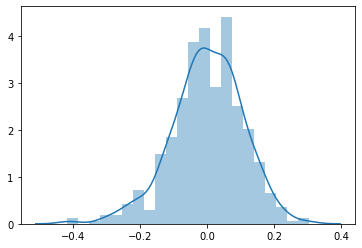

In [93]:
sns.distplot(res)
plt.show()

In [94]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_sales)

0.7739297575415915

#Making Prediction
#applying the scaling on the test scale

In [95]:
var = ['atemp','hum','windspeed','cnt']

df_test[var] = scaler.transform(df_test[var])

Diving now X_test and y_test

In [96]:
y_test = df_test.pop('cnt')
X_test = df_test

In [97]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)

In [98]:
y_test_predict  = lm.predict(X_test_lm)

In [99]:
res  = y_test - y_test_predict

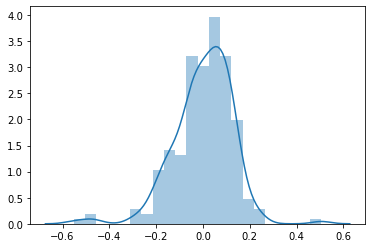

In [100]:
sns.distplot(res)

In [101]:
#calculating R2 score for test to evaluate our model 
r2_score(y_test, y_test_predict)

0.6813094219154396

Text(0, 0.5, 'y_pred')

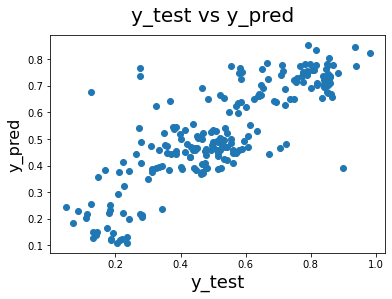

In [102]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_predict)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)